In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
day0 = pd.read_csv("prices_round_4_day_1.csv", sep = ';')
day1 = pd.read_csv("prices_round_4_day_2.csv", sep = ';')
day2 = pd.read_csv("prices_round_4_day_3.csv", sep = ';')

day1["timestamp"] += 1000000
day2["timestamp"] += 2000000

all_data = pd.concat([day0, day1, day2])
all_data = all_data.set_index("timestamp")

In [4]:
coconut_mid = all_data[all_data["product"] == "COCONUT"]["mid_price"]
coconut_coup_mid = all_data[all_data["product"] == "COCONUT_COUPON"]["mid_price"]

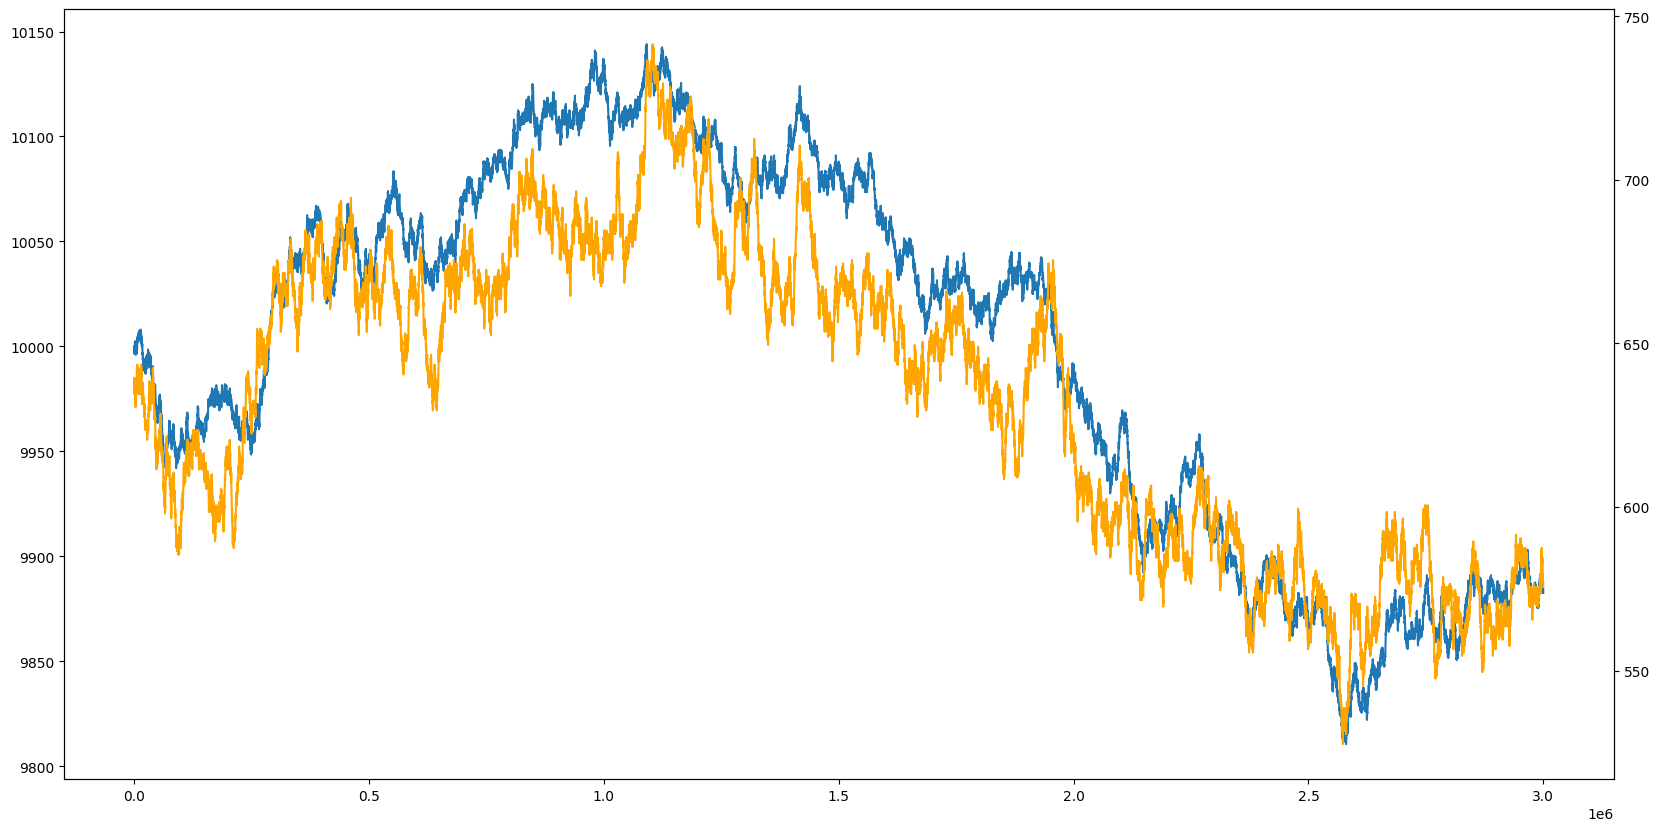

In [5]:
fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.plot(coconut_mid)
ax2 = ax1.twinx()
ax2.plot(coconut_coup_mid, c = "orange")

plt.show()

In [28]:
from statistics import NormalDist
from scipy.optimize import newton

def black_scholes_price(S, K, t, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    price = S * NormalDist().cdf(d1) - K * np.exp(-r * t) * NormalDist().cdf(d2)
    return price

def implied_volatility(market_price, S, K, t, r, initial_guess=0.2):
    objective_function = lambda sigma: black_scholes_price(S, K, t, r, sigma) - market_price
    return newton(objective_function, initial_guess)

K = 10000
t = 250
r = 0
prices = []
sigmas = []
for i in range(len(coconut_coup_mid)):
    S = coconut_mid.iloc[i]
    mp = coconut_coup_mid.iloc[i]
    sigma = implied_volatility(mp, S, K, t, r)
    sigmas.append(sigma)
    prices.append(black_scholes_price(S, K, t, r, sigma))



In [29]:
prices[0:10]

[637.4999999999991,
 637.4999999999991,
 637.5000000000009,
 638.5,
 637.5000000000009,
 637.5,
 636.5000000000009,
 639.5,
 636.5000000000009,
 634.5000000000009]

In [20]:
coconut_coup_mid.iloc[0:10]

timestamp
0      637.5
100    637.5
200    637.5
300    638.5
400    637.5
500    637.5
600    636.5
700    639.5
800    636.5
900    634.5
Name: mid_price, dtype: float64

In [36]:
new_prices = []

K = 10000
t = 250
r = 0
sigma = np.mean(sigmas)
for i in range(len(coconut_coup_mid)):
    S = coconut_mid.iloc[i]
    new_prices.append(black_scholes_price(S, K, t, r, sigma))

In [37]:
new_prices[0:10]

[634.1269797732639,
 633.8611578402997,
 633.3297014375985,
 633.8611578402997,
 633.3297014375985,
 632.2675386158762,
 632.5329855616892,
 633.0640669772092,
 632.5329855616892,
 632.2675386158762]

In [38]:
coconut_coup_mid.iloc[0:10]

timestamp
0      637.5
100    637.5
200    637.5
300    638.5
400    637.5
500    637.5
600    636.5
700    639.5
800    636.5
900    634.5
Name: mid_price, dtype: float64

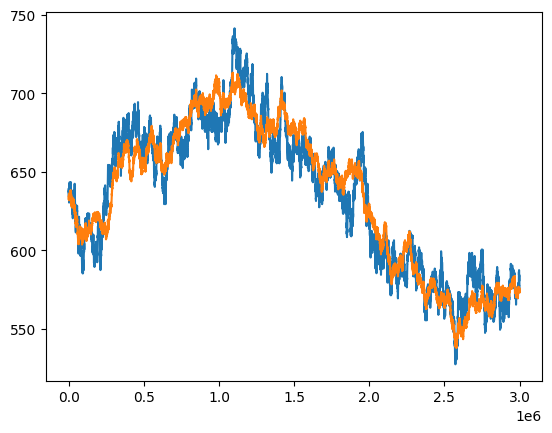

In [39]:
plt.plot(coconut_coup_mid)
plt.plot(coconut_coup_mid.index, new_prices)

<Axes: >

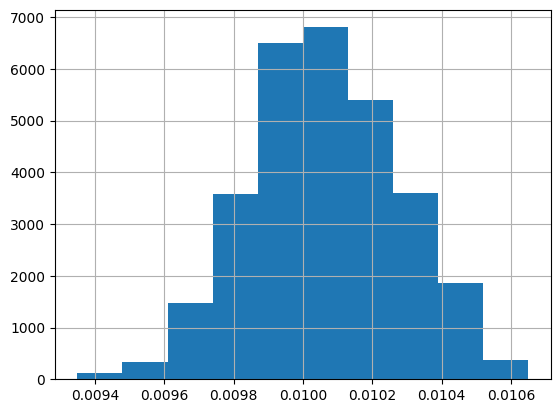

In [25]:
pd.Series(sigmas).hist()

In [26]:
np.mean(sigmas)

0.010063617743242183

In [40]:
premium = coconut_mid - coconut_coup_mid

In [59]:
coconut_mid.mean()

9999.900983333333

In [60]:
coconut_mid.std()

88.75414439509287

In [78]:
sells = coconut_mid[coconut_mid > coconut_mid.mean() + (1.4 * coconut_mid.std())]
buys = coconut_mid[coconut_mid < coconut_mid.mean() - (1.6 * coconut_mid.std())]

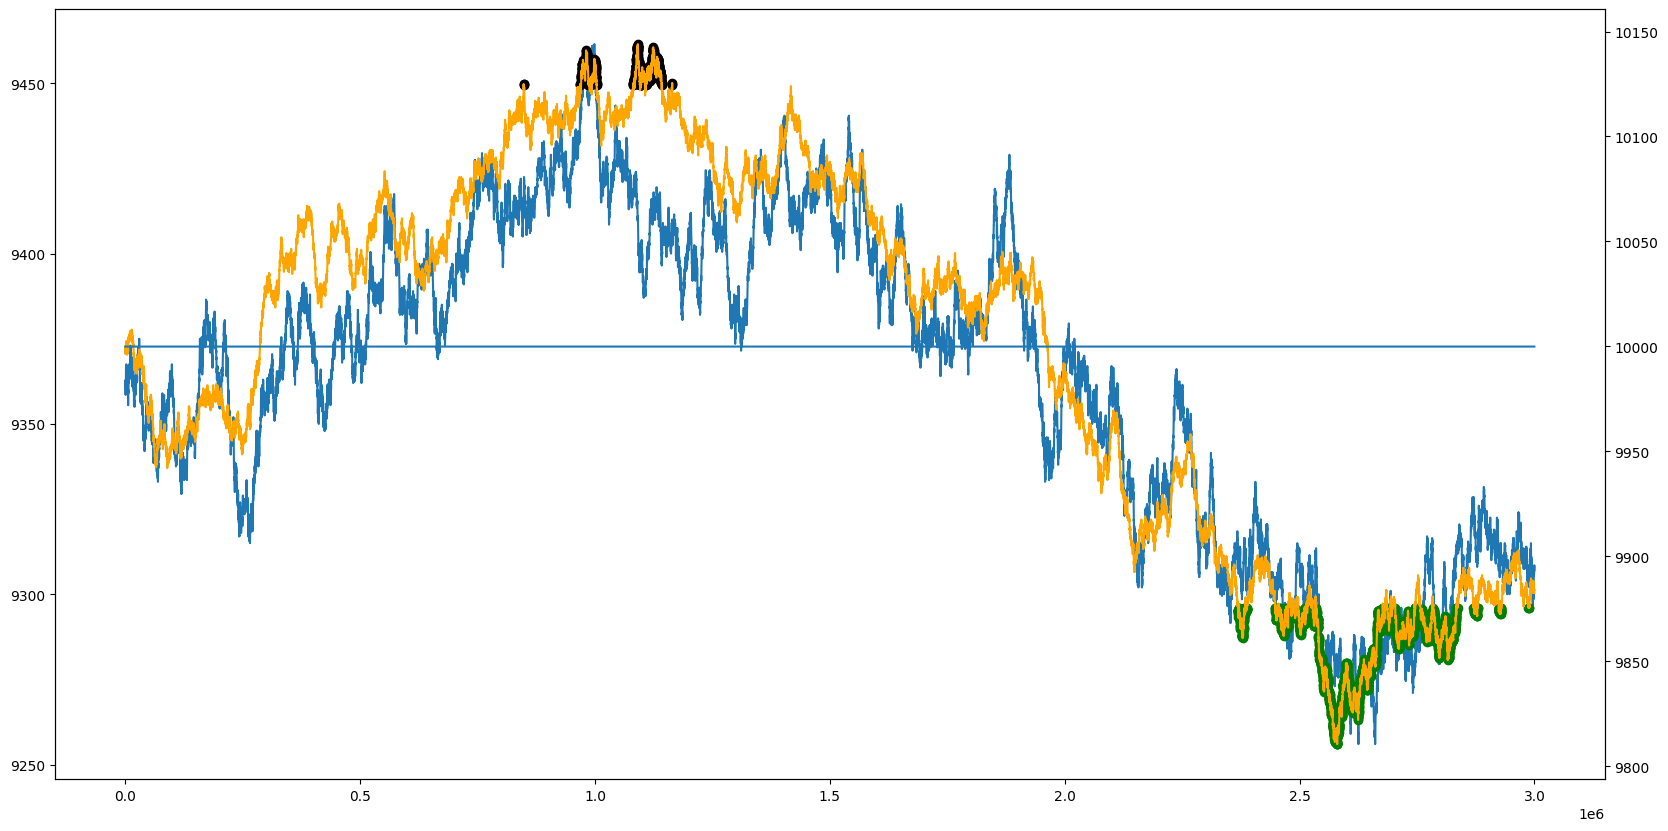

In [79]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(premium)
ax2 = ax.twinx()
ax2.plot(coconut_mid, c="orange")
plt.plot(coconut_mid.index, [coconut_mid.mean()] * len(coconut_mid))
ax2.scatter(sells.index, sells.values, c = "black")
ax2.scatter(buys.index, buys, c="green")